## The problem

Todoay we are going to test a very simple example of nonlinear least square curve fitting using the *scipy.optimize* module.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Create data

Let's assume we have the following points *[xdata, ydata]* and that we want to fit these data with the following model function using nonlinear least squares:

$F(p_1,p_2,x) = p_1\cos(p_2x) + p_2\sin(p_1x)$

For now, we are primarily interested in the following results:

* The **fit parameters**
* Sum of squared **residuals**<!-- TEASER_END -->



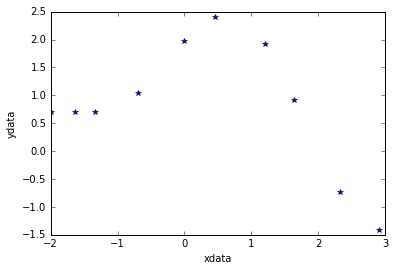

In [10]:
xdata = np.array([-2,-1.64,-1.33,-0.7,0,0.45,1.2,1.64,2.32,2.9])
ydata = np.array([0.699369,0.700462,0.695354,1.03905,1.97389,2.41143,1.91091,0.919576,-0.730975,-1.42001])

# Show data points
plt.plot(xdata,ydata,'*')
plt.xlabel('xdata')
plt.ylabel('ydata');

## Define fit function

In [4]:
def func(x, p1,p2):
  return p1*np.cos(p2*x) + p2*np.sin(p1*x)

## Calculate and show fit parameters.  

Use a starting guess of $p_1=1$ and $p_2=0.2$

The outputs of the *curve_fit* function are the following:
* **popt** : array of *optimal values* for the parameters so that the sum of the squared error of $f(xdata, *popt) - ydata$ is minimized

* **pcov** : 2d array of the estimated covariance of *popt*. The diagonals provide the *variance of the parameter estimate*. To compute one standard deviation errors on the parameters use $perr = np.sqrt(np.diag(pcov))$. If the Jacobian matrix at the solution doesn't have a full rank, then 'lm' method returns a matrix filled with ``np.inf``, on the other hand 'trf'  and 'dogbox' methods use Moore-Penrose pseudoinverse to compute the covariance matrix.

In [16]:
popt, pcov = curve_fit(func, xdata, ydata,p0=(1.0,0.2))

print("Parameter estimation results:")
print("p1 = ",popt[0]," | p2 = ",popt[1])
print("--------------------------")
print("Covariance matrix of the estimate:")
print(pcov)

Parameter estimation results:
p1 =  1.881850994  | p2 =  0.700229857403
--------------------------
Covariance matrix of the estimate:
[[  7.52408290e-04   1.00812823e-04]
 [  1.00812823e-04   8.37695698e-05]]


## Sum of squares of residuals 

Since it's not given by the *curve_fit* function, we have to compute it *by hand*

In [18]:
p1 = popt[0]
p2 = popt[1]
residuals = ydata - func(xdata,p1,p2)
fres = sum(residuals**2)

print("Residuals sum of squares:")
print(fres)

Residuals sum of squared:
0.0538126964188


Plot fitted curve along with data

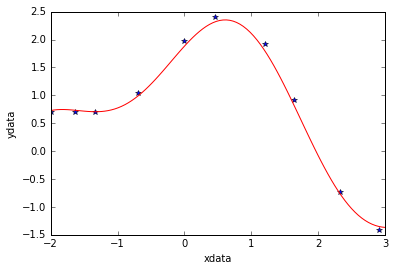

In [8]:
curvex=np.linspace(-2,3,100)
curvey=func(curvex,p1,p2)
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel('xdata')
plt.ylabel('ydata');